In [50]:
import math

In [1]:
import pandas as pd

import numpy as np

import nltk

import re
from collections import Counter

import string

import pprint

In [87]:
from statistics import mean

In [88]:
from itertools import islice

Nb Formatting 

In [2]:
pd.options.display.max_seq_items = 2000

pd.set_option('display.max_columns', 100)

# Data setup

Open Dataset 

In [3]:
#ignore header for easier (ordinal) indexing
datasheet = pd.read_excel('CogData_FU.xlsx',header=None)

In [4]:
len(datasheet)

577

In [5]:
datasheet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
0,Record ID,Event Name,Write a short sketch about a memory from your ...,How does technology and social media impact th...,Date of Neurobehavioral Status Exam,Notes,NIH Toolbox ID,NIH Toolbox Password,Crystallized Composite fully adjusted,Picture Vocab fully adjusted,Picture Vocab age adjusted,Picture Vocab computed,Oral Reading Recognition fully adjusted,Oral Reading Recognition age adjusted,Oral Reading Recognition computed,RAVLT Trial1,RAVLT Trial2,RAVLT Trial3,RAVLT Delayed Recall,RAVLT: Total Recognition Score,RAVLT: False Positive Score,RAVLT Percentile,Picture Sequence Memory fully adjusted,Picture Sequence Age Adjusted,Picture Sequence Memory computed score,List Sorting fully adjusted,List Sorting Age Adjusted,List Sorting raw score,Dimensional Change Card Sort Fully Adjusted,Dimensional Change Age Adjusted,Dimensional Change computed score,Dimensional Change raw score,Flanker Inhibitory Attention & Control Fully A...,Flanker Inhibitory Attention & Control age adj...,Flanker computed score,Flanker raw score,Pattern Comparison Fully Adjusted Scale Score,Pattern Comparison age adjusted,Pattern Comparison Raw Score,Odor Identification Fully Adjusted Scale Score,Odor Identification age adjusted,Odor Identification (Raw),Oral Digit Symbol Percentile,Oral Digit Symbol (Raw),Date of Short Cognitive Testing,FAS Letter Fluency,FAS Percentile,FAS Fully Adjusted,Animal Naming Test,Animal Naming Test Percentile,Animal Naming Fully Adjusted,Trail Making Test B,Trail Making Test B Percentile,Trail Making Fully Adjusted,Boston Naming,Boston Naming Percentile,Boston Naming Fully Adjusted,Neurotrack ID,Neurotrack Date,NT Mean Novelty Preference Score,Neurotrack Score (Median),1. Orientation Score,1a. Time,1b. Place,2. Registration,3. Attention and Calculation,4. Recall,5. Language,5a. Naming,5b. Repetition,5c. 3-stage Command,5d. Reading,5e. Writing,5f. Copying,Total MMSE score,Story Version,Immediate Recall,Immediate Recall Percentile,Delayed Recall,Delayed Recall Percentile,Facial Recognition A,Cued First Letter A,Multiple Choice Names A,Facial Recognition B,Cued First Letter B,Multiple Choice Names B,CogStateID,Date Conducted:,CogState: Detection,CogState: Identification,CogState: One Card Learning,CogState: One Back Speed,Cog State: One Back Accuracy,Ravens Progressive Matrices,Logical Memory Part B,East Boston Immediate Recall,Complete?
1,10,Baseline,NaN,NaN,2015-02-23 00:00:00,"RAVLT recognition, Odor ID and Trails B not ad...",85176,NaN,83.32,73.6571,83.1442,1464,100.106,109.371,2180,2,3,3,0,NaN,NaN,<25,95.04,95.98,407.08,68.03,74.62,8,82.9,88.57,5.85,30,68.51,72.43,4.88,19,67.64,70.46,28,NaN,NaN,NaN,<min,26,NaN,21,<10,NaN,7,<10,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,5,1,4,3,4,0,9,2,1,3,1,1,1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
2,10,FU Visit 2,NaN,NaN,2015-09-28 00:00:00,Trails B incomplete,65967,NaN,129.69,104.74,107.1,1739,127.399,132.224,2578,3,3,4,0,9,16,<25,NaN,NaN,NaN,NaN,NaN,NaN,81.81,87.53,5.74,25,81.03,86.93,6.85,20,54.96,58.74,18,91.83,89.99,6,<25,35,NaN,27,20-30,NaN,10,<10,NaN,NaN,NaN,NaN,11,NaN,NaN,S_172,2015-09-28 00:00:00,0.548938,0.642857,5,2,3,3,5,0,9,2,1,3,1,1,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
3,13,Baseline,NaN,NaN,2015-02-24 00:00:00,Odor ID not administered,15497,NaN,140.09,122.101,126.974,2001,153.735,153.95,5220,8,10,14,12,NaN,NaN,>75,113.71,114.05,596.02,122.3,128,23,101.5,108.28,8.65,30,83.14,87.7,7.9,20,114.81,118.54,67,NaN,NaN,NaN,>75,108,NaN,70,>90,NaN,35,>90,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401201572678100,2015-04-01 

Row Indices of Memory Responses 

In [6]:
#ignore first (header) column
memory_ix = datasheet.iloc[1:][datasheet.iloc[1:,2].notnull()].index

Record IDs of Memory Respondents [Analyze all scores from each participant]

In [7]:
memory_id = list(datasheet.iloc[memory_ix][0])

Confirm Unique Response-Respondents 

In [8]:
len(memory_id)

46

In [9]:
len(set(memory_id))

46

In [10]:
datasheet.iloc[memory_ix]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
6,14,Baseline,When I was a little child I had the same exper...,I stay in touch with family and friends throug...,2015-02-26 00:00:00,NaN,35926,qjh,123.54,126.545,131.008,2048,114.984,120.673,2378,4,3,6,2,NaN,NaN,NaN,99.13,104.48,455.07,94.85,101.4,14,106.02,112.97,7.52,30,84.37,88.37,6.97,20,97.93,102.12,47,NaN,NaN,NaN,25-50,57,NaN,46,60-70,NaN,20,50-75,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317201572669916,2015-03-17 00:00:00,102,99,103,93,116,NaN,NaN,NaN,Complete
29,26,Baseline,"When I was very young, living in the Astoria n...",I'm a journalist who has covered the rise of t...,2015-02-03 00:00:00,RAVLT rec not administered,36080,NaN,148.32,145.587,151.803,2387,123.836,129.301,2536,5,9,12,3,NaN,NaN,>75,98.49,99.03,441.15,117.08,123.29,20,90.58,96.61,7.23,30,80.58,84.76,7.13,20,96.19,99.72,50,NaN,NaN,NaN,<25,56,NaN,53,80,NaN,26,>90,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054,2015-02-03 00:00:00,113,112,100,100,103,NaN,NaN,NaN,Complete
51,64,Baseline,I went to Paris when I was 16. I was staying ...,My husband and I are on our computers all day ...,2015-05-08 00:00:00,No Rey recognition,61681,NaN,130.68,134.57,139.464,2163,115.002,120.701,2379,7,10,11,6,NaN,NaN,>75,NaN,NaN,NaN,NaN,NaN,NaN,116.76,122.84,8.3,30,113.97,119.91,8.68,20,122.25,126.13,60,132.15,137.68,9,50-75,62,NaN,47,60-70,NaN,22,75,NaN,84,50,NaN,15,NaN,NaN,S_53,2015-05-08 00:00:00,poor quality,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61620151847168,2015-06-16 00:00:00,NaN,NaN,80,96,61,NaN,NaN,NaN,Complete
56,67,Baseline,My husband and I had always wanted to go to Pa...,"I'm on the computer all the time, writing or r...",2015-03-17 00:00:00,No RAVLT recognition and Odor ID,56478,NaN,130.99,129.869,132.736,2131,120.448,123.786,2449,7,10,12,10,NaN,NaN,>75,NaN,NaN,NaN,NaN,NaN,NaN,80.55,83.58,6.04,29,82.62,86.65,7.28,20,72,75.96,36,NaN,NaN,NaN,25-50,62,2015-03-17 00:00:00,49,70,NaN,29,>90,NaN,72,20-30,NaN,14,NaN,NaN,I_11,2015-03-17 00:00:00,0.570714,0.6,10,5,5,3,5,3,9,1,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325201574035660,2015-03-25 00:00:00,96,105,109,99,103,NaN,NaN,NaN,Complete
78,101,Baseline,I was born in Hungary. A significant memory is...,My use of social media is minimal. I only use ...,2015-03-06 00:00:00,No RAVLT rec and Odor ID,52303,NaN,123.55,117.09,121.136,1967,120.986,124.254,2455,6,9,10,7,NaN,NaN,>75,NaN,NaN,NaN,97.45,103.11,16,92.3,97.7,7.31,29,78.6,81.54,6.8,20,88.52,92.83,46,NaN,NaN,NaN,25-50,60,NaN,30,2018-10-20 00:00:00,NaN,11,<10,NaN,66,60-70,NaN,13,NaN,NaN,I_00,2015-03-06 00:00:00,0.470714,0.5,10,5,5,3,5,2,9,2,1,3,1,1,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422201573922344,2015-04-22 00:00:00,NaN,113,72,NaN,NaN,NaN,NaN,NaN,Complete
89,110,Baseline,When I was 16 years old I traveled to Europe b...,I check that on what my children are doing and...,2016-03-04 00:00:00,NaN,78039,vab,137.14,133,137.148,2164,124.176,129.631,2505,9,12,15,13,14,1,>75,NaN,NaN,NaN,NaN,NaN,NaN,111.59,118.1,9,30,118.52,124.95,9.56,20,128.01,132.7,70,111.87,118.02,9,50-75,78,2016-03-04 00:00:00,76,>90,NaN,28,75-90,NaN,35,>90,NaN,15,NaN,NaN,I_338,2016-03-01 00:00:00,0.595952,0.595952,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304201673920436,2016-03-04 00:00:00,106,105,112,102,103,NaN,NaN,NaN,Complete
100,135,Baseline,I have great memories of growing up in huge ho...,Technology has helped me connect to family and...,2015-04-20 00:00:00,No RAVLT rec.,59106,NaN,105.68,106.366,108.008,1767,104.435,109.664,2163,4,8,9,7,NaN,NaN,25-50,NaN,NaN,NaN,NaN,NaN,NaN,

Tech respondents

In [11]:
tech_ix = datasheet.iloc[1:][datasheet.iloc[1:,3].notnull()].index

In [12]:
tech_ix

Int64Index([  6,  29,  51,  56,  78,  89, 100, 107, 118, 154, 184, 202, 217,
            226, 234, 242, 266, 277, 280, 286, 297, 303, 324, 337, 347, 352,
            359, 375, 387, 398, 411, 423, 433, 438, 445, 448, 460, 464, 470,
            474, 477, 496, 499, 502, 506, 509, 519, 522, 537, 540],
           dtype='int64')

In [13]:
tech_id = list(datasheet.iloc[tech_ix][0])

In [14]:
len(tech_id) == len(set(tech_id))

True

Tech-exclusive respondents

In [15]:
#row indices of tech-respondents, mem-negligent
[tix for tix in tech_ix if tix not in memory_ix]

[234, 280, 337, 519]

In [16]:
#record ids of tech-respondents who are mem-negligent
tech_x_ids = [tid for tid in tech_id if tid not in memory_id]

Mem-exclusive respondents

In [17]:
#mem respondents who are tech-negligent
[m for m in memory_id if m not in tech_id]

[]

Indices of all Respondent-rows, by record ID

In [18]:
#all rows for tech_respondents
tech_all_ix = [ix for ix in datasheet.index if datasheet.iloc[ix,0] in tech_id]

In [19]:
datasheet.iloc[tech_all_ix]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
6,14,Baseline,When I was a little child I had the same exper...,I stay in touch with family and friends throug...,2015-02-26 00:00:00,NaN,35926,qjh,123.54,126.545,131.008,2048,114.984,120.673,2378,4,3,6,2,NaN,NaN,NaN,99.13,104.48,455.07,94.85,101.4,14,106.02,112.97,7.52,30,84.37,88.37,6.97,20,97.93,102.12,47,NaN,NaN,NaN,25-50,57,NaN,46,60-70,NaN,20,50-75,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317201572669916,2015-03-17 00:00:00,102,99,103,93,116,NaN,NaN,NaN,Complete
7,14,FU Visit 2,NaN,NaN,2015-07-14 00:00:00,NaN,82858,NaN,126.32,124.077,129.483,2018,119.487,124.812,2448,4,8,9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.73,127.93,8.87,27,113.43,119.36,8.65,20,122.25,126.13,60,77.81,80.25,5,<50,59,NaN,50,>70,NaN,16,25,NaN,90,30-40,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702201572669916,2015-07-02 00:00:00,108,99,95,91,107,NaN,NaN,NaN,Complete
8,14,FU Visit 3,NaN,NaN,2016-03-07 00:00:00,NaN,48846,evf,132.09,132.171,135.169,2128,119.993,125.099,2457,2,7,8,3,9,1,50-75,NaN,NaN,NaN,NaN,NaN,NaN,125.63,131.41,9.22,30,116.99,122.7,8.84,20,122.25,126.13,60,112,116.35,8,50-75,69,2016-03-07 00:00:00,50,80-90,NaN,25,>90,NaN,95,60,NaN,15,NaN,NaN,I_340,2016-03-07 00:00:00,unscorable,NaN,9,4,5,3,5,3,9,2,1,3,1,1,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307201672669916,2016-03-07 00:00:00,102,98,110,92,101,NaN,NaN,NaN,Complete
9,14,FU Visit 4,NaN,NaN,2016-08-25 00:00:00,NaN,94255,yua,126.02,132.98,136.123,2138,113.024,118.634,2344,7,9,11,9,11,0,>75,NaN,NaN,NaN,NaN,NaN,NaN,120.66,125.95,8.66,29,110.39,116.18,8.5,20,112.71,117.19,55,87.26,89.99,6,50,60,2016-08-25 00:00:00,45,70-80,NaN,16,25-50,NaN,95,50,NaN,15,NaN,NaN,I_410,2016-08-25 00:00:00,unscorable,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,A,10,NaN,8,NaN,12,1,8,NaN,NaN,NaN,702201572669916,2016-08-25 00:00:00,105,94,104,86,103,NaN,NaN,NaN,Complete
10,14,FU Visit 5,NaN,NaN,2017-02-17 00:00:00,NaN,45760,mur,134.39,134.534,139.433,2163,119.738,124.89,2452,5,6,8,5,11,2,50-75,NaN,NaN,NaN,NaN,NaN,NaN,116.47,122.56,8.27,29,116.44,122.32,8.8,20,116.53,120.58,57,98.2,101.73,7,50-75,71,2017-02-17 00:00:00,55,80-90,NaN,24,75-90,NaN,103,30,NaN,15,NaN,NaN,I_481,2017-02-17 00:00:00,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,B,8,NaN,6,NaN,12,3,5,NaN,NaN,NaN,217201772669916,2017-02-17 00:00:00,104,98,106,93,101,NaN,NaN,NaN,Complete
11,14,FU Visit 6,NaN,NaN,2017-09-15 00:00:00,NaN,84695,hfa,120.9,130.529,134.17,2111,105.981,113.037,2241,4,6,9,4,11,6,50-75,NaN,NaN,NaN,NaN,NaN,NaN,118.24,124.23,8.42,30,113.82,119.68,8.67,20,120.2,124.32,59,98.2,101.73,7,50-75,63,2017-09-15 00:00:00,40,40-50,NaN,18,25-50,NaN,84,50,NaN,15,NaN,NaN,I_597,2017-09-15 00:00:00,unscorable,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,A,11,NaN,11,NaN,NaN,NaN,NaN,12,5,11,217201772669916,2017-09-15 00:00:00,102,98,105,93,103,NaN,NaN,NaN,Complete
12,14,FU Visit 7,NaN,NaN,2018-04-16 00:00:00,NaN,12836,wtc,132.08,135.857,141.764,2189,114.399,120.015,2370,5,7,10,6,10,1,>75,NaN,NaN,NaN,NaN,NaN,NaN,119.76,125.35,8.56,30,108.67,114.54,8.41,20,125.84,129.77,62,98.2,101.73,7,50-75,61,2018-04-16 00:00:00,51,70-80,NaN,17,25-50,NaN,113,<10,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,9,4,5,3,5,2,9,2,1,3,1,1,1,28,B,10,NaN,9,NaN,12,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
29,26,Baseline,"When I was very young, living in the Astoria n...",I'm a journalist who has covered the rise of t...,2015-02-03 00:00:00,RAVLT rec not administered,36080,NaN,148.32,145.587,151.803,2387,123.836,129.301,2536,5,9,12,3,NaN,NaN,>75,98.49,99.03,441.15,117.08,123.29,20,90.58,96.61,7.23,30,80.58,84.76,7.13,20,96.19,99.72,50,NaN,NaN,NaN,<25,56,NaN,53,80,NaN,26,>90,NaN

In [20]:
mem_all_ix = [ix for ix in datasheet.index if datasheet.iloc[ix,0] in memory_id]

In [21]:
datasheet.iloc[mem_all_ix]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
6,14,Baseline,When I was a little child I had the same exper...,I stay in touch with family and friends throug...,2015-02-26 00:00:00,NaN,35926,qjh,123.54,126.545,131.008,2048,114.984,120.673,2378,4,3,6,2,NaN,NaN,NaN,99.13,104.48,455.07,94.85,101.4,14,106.02,112.97,7.52,30,84.37,88.37,6.97,20,97.93,102.12,47,NaN,NaN,NaN,25-50,57,NaN,46,60-70,NaN,20,50-75,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317201572669916,2015-03-17 00:00:00,102,99,103,93,116,NaN,NaN,NaN,Complete
7,14,FU Visit 2,NaN,NaN,2015-07-14 00:00:00,NaN,82858,NaN,126.32,124.077,129.483,2018,119.487,124.812,2448,4,8,9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.73,127.93,8.87,27,113.43,119.36,8.65,20,122.25,126.13,60,77.81,80.25,5,<50,59,NaN,50,>70,NaN,16,25,NaN,90,30-40,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702201572669916,2015-07-02 00:00:00,108,99,95,91,107,NaN,NaN,NaN,Complete
8,14,FU Visit 3,NaN,NaN,2016-03-07 00:00:00,NaN,48846,evf,132.09,132.171,135.169,2128,119.993,125.099,2457,2,7,8,3,9,1,50-75,NaN,NaN,NaN,NaN,NaN,NaN,125.63,131.41,9.22,30,116.99,122.7,8.84,20,122.25,126.13,60,112,116.35,8,50-75,69,2016-03-07 00:00:00,50,80-90,NaN,25,>90,NaN,95,60,NaN,15,NaN,NaN,I_340,2016-03-07 00:00:00,unscorable,NaN,9,4,5,3,5,3,9,2,1,3,1,1,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307201672669916,2016-03-07 00:00:00,102,98,110,92,101,NaN,NaN,NaN,Complete
9,14,FU Visit 4,NaN,NaN,2016-08-25 00:00:00,NaN,94255,yua,126.02,132.98,136.123,2138,113.024,118.634,2344,7,9,11,9,11,0,>75,NaN,NaN,NaN,NaN,NaN,NaN,120.66,125.95,8.66,29,110.39,116.18,8.5,20,112.71,117.19,55,87.26,89.99,6,50,60,2016-08-25 00:00:00,45,70-80,NaN,16,25-50,NaN,95,50,NaN,15,NaN,NaN,I_410,2016-08-25 00:00:00,unscorable,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,A,10,NaN,8,NaN,12,1,8,NaN,NaN,NaN,702201572669916,2016-08-25 00:00:00,105,94,104,86,103,NaN,NaN,NaN,Complete
10,14,FU Visit 5,NaN,NaN,2017-02-17 00:00:00,NaN,45760,mur,134.39,134.534,139.433,2163,119.738,124.89,2452,5,6,8,5,11,2,50-75,NaN,NaN,NaN,NaN,NaN,NaN,116.47,122.56,8.27,29,116.44,122.32,8.8,20,116.53,120.58,57,98.2,101.73,7,50-75,71,2017-02-17 00:00:00,55,80-90,NaN,24,75-90,NaN,103,30,NaN,15,NaN,NaN,I_481,2017-02-17 00:00:00,NaN,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,B,8,NaN,6,NaN,12,3,5,NaN,NaN,NaN,217201772669916,2017-02-17 00:00:00,104,98,106,93,101,NaN,NaN,NaN,Complete
11,14,FU Visit 6,NaN,NaN,2017-09-15 00:00:00,NaN,84695,hfa,120.9,130.529,134.17,2111,105.981,113.037,2241,4,6,9,4,11,6,50-75,NaN,NaN,NaN,NaN,NaN,NaN,118.24,124.23,8.42,30,113.82,119.68,8.67,20,120.2,124.32,59,98.2,101.73,7,50-75,63,2017-09-15 00:00:00,40,40-50,NaN,18,25-50,NaN,84,50,NaN,15,NaN,NaN,I_597,2017-09-15 00:00:00,unscorable,NaN,10,5,5,3,5,3,9,2,1,3,1,1,1,30,A,11,NaN,11,NaN,NaN,NaN,NaN,12,5,11,217201772669916,2017-09-15 00:00:00,102,98,105,93,103,NaN,NaN,NaN,Complete
12,14,FU Visit 7,NaN,NaN,2018-04-16 00:00:00,NaN,12836,wtc,132.08,135.857,141.764,2189,114.399,120.015,2370,5,7,10,6,10,1,>75,NaN,NaN,NaN,NaN,NaN,NaN,119.76,125.35,8.56,30,108.67,114.54,8.41,20,125.84,129.77,62,98.2,101.73,7,50-75,61,2018-04-16 00:00:00,51,70-80,NaN,17,25-50,NaN,113,<10,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,9,4,5,3,5,2,9,2,1,3,1,1,1,28,B,10,NaN,9,NaN,12,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
29,26,Baseline,"When I was very young, living in the Astoria n...",I'm a journalist who has covered the rise of t...,2015-02-03 00:00:00,RAVLT rec not administered,36080,NaN,148.32,145.587,151.803,2387,123.836,129.301,2536,5,9,12,3,NaN,NaN,>75,98.49,99.03,441.15,117.08,123.29,20,90.58,96.61,7.23,30,80.58,84.76,7.13,20,96.19,99.72,50,NaN,NaN,NaN,<25,56,NaN,53,80,NaN,26,>90,NaN

Column index Dict

Investigate score spread

In [23]:
datasheet.iloc[tech_ix,51:54]

,51,52,53
6,NaN,NaN,NaN
29,NaN,NaN,NaN
51,84,50,NaN
56,72,20-30,NaN
78,66,60-70,NaN
89,35,>90,NaN
100,74,20-30,NaN
107,NaN,NaN,NaN
118,55,80-90,NaN
154,45,80-90,NaN


In [24]:
#MMSE
datasheet.iloc[tech_all_ix][[0,1,4,74]]

,0,1,4,74
6,14,Baseline,2015-02-26 00:00:00,30
7,14,FU Visit 2,2015-07-14 00:00:00,30
8,14,FU Visit 3,2016-03-07 00:00:00,29
9,14,FU Visit 4,2016-08-25 00:00:00,30
10,14,FU Visit 5,2017-02-17 00:00:00,30
11,14,FU Visit 6,2017-09-15 00:00:00,30
12,14,FU Visit 7,2018-04-16 00:00:00,28
29,26,Baseline,2015-02-03 00:00:00,30
30,26,FU Visit 2,2015-07-28 00:00:00,30
31,26,FU Visit 3,2016-01-28 00:00:00,29


In [25]:
#MMSE scores
#6 unique...
np.unique([int(i) for i in datasheet.iloc[tech_all_ix][74].dropna()],return_counts=True)

(array([23, 26, 27, 28, 29, 30]),
 array([  1,   2,   1,  16,  48, 152], dtype=int64))

In [26]:
#Min MMSE
datasheet.iloc[tech_all_ix][74].min()

23

In [27]:
#The maximum MMSE score is 30 points. A score of 20 to 24 suggests mild dementia, 13 to 20 suggests moderate dementia, and less than 12 indicates severe dementia.
#participants with MCI...one ---
datasheet.iloc[tech_all_ix][74][datasheet.iloc[tech_all_ix][74] < 25]

390    23
Name: 74, dtype: object

In [28]:
#Unique words

In [29]:
len(tech_ix)

50

# Reference

## Column names

In [22]:
[(i,test) for( i,test) in enumerate(datasheet.iloc[0])]

[(0, 'Record ID'),
 (1, 'Event Name'),
 (2,
  'Write a short sketch about a memory from your childhood and why it is memorable or important to you. Feel free to discuss an event with family or friends, a place you traveled, or a significant time in your life.  Please limit your response to no more than 1-2 paragraphs.  '),
 (3,
  'How does technology and social media impact the daily lives of you and your family?Please limit your response to no more than 1-2 paragraphs.  '),
 (4, 'Date of Neurobehavioral Status Exam'),
 (5, 'Notes'),
 (6, 'NIH Toolbox ID'),
 (7, 'NIH Toolbox Password'),
 (8, 'Crystallized Composite fully adjusted'),
 (9, 'Picture Vocab fully adjusted'),
 (10, 'Picture Vocab age adjusted'),
 (11, 'Picture Vocab computed'),
 (12, 'Oral Reading Recognition fully adjusted'),
 (13, 'Oral Reading Recognition age adjusted'),
 (14, 'Oral Reading Recognition computed'),
 (15, 'RAVLT Trial1'),
 (16, 'RAVLT Trial2'),
 (17, 'RAVLT Trial3'),
 (18, 'RAVLT Delayed Recall'),
 (19, 'RA

## 466k Word list

In [141]:
with open('words.txt','r') as words:
    word_list = words.read().splitlines()

word_list = [w.lower() for w in word_list]

In [142]:
len(word_list)

466544

## nltk pos data dictionary

In [63]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

# Feature Extraction

In [30]:
#memory response
mem_corpus = datasheet.iloc[memory_ix,2]

In [31]:
#tech response
tech_corpus = datasheet.iloc[tech_ix,3]

# Helper Functions

## Tokenization

In [112]:
#Mis-spellings, word length
#rm puctuation
#keep contractions, posessives
def list_tokenize(response):
    return re.sub('['+string.punctuation.replace('\'','')+']',' ',response).split()

## Information extraction nltk

In [139]:
#information-extraction
#https://www.nltk.org/book/ch07.html
def ie_preprocess(document):
    #sentence segmentation
    sentences = nltk.sent_tokenize(document) 
    #tokenization
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    #pos tagging
    sentences = [nltk.pos_tag(sent) for sent in sentences] 
    
    return sentences

## Uniq

In [127]:
def uniq_responses (response,token_list=None, counts_vector_return=False,uniq_set_return=False):
    if token_list is None: token_list = list_tokenize(response)
    if counts_vector_return and uniq_set_return: return np.unique(token_list,return_counts=True)
    
    if counts_vector_return and not uniq_set_return: return np.unique(token_list,return_counts=True)[1]
    
    if uniq_set_return and not counts_vector_return: return np.unique(token_list)
    #typical case, investigating number of uniq responses
    
    return len(np.unique(token_list))
        

## N-grams

In [118]:
#http://locallyoptimal.com/blog/2013/01/20/elegant-n-gram-generation-in-python/
#input
def find_bigrams(response, return_list=False):
    input_list = list_tokenize(response)
    bigrams = zip(input_list, input_list[1:])
    if return_list: return [b for b in bigrams]
    else: return bigrams

## Word count

In [121]:
def word_count(response):
    return len(list_tokenize(response))

## Sentence count

In [140]:
def sentence_count(response):
    return len(ie_preprocess(response))

## Rates

In [159]:
def pos_rate(response,pos_response=None,tag_set=None,denom_set=None,N=None,nn=False,pn=False,vb=False,proper=None):
    
    if pos_response is None: pos_response = ie_preprocess(response)
        
    
    if tag_set is None:
        #common nouns, excluding proper nouns
        if nn: tag_set = ['NN','NNS']
        elif vb: tag_set = ['VB','VBD','VBG','VBN','VBP','VBZ'] 
        elif pn: tag_set = ['PRP','PRP$']
        elif proper: 
            tag_set = ['PRP','PRP$','WP','WP$']
            denom_set = ['PRP','PRP$','WP','WP$','NN','NNP','NNPS','NNS']
        
    pos_count = sum([1 for sentence in pos_response for word in sentence if word[1] in tag_set])
    
    if denom_set: 
        denom_count = sum([1 for sentence in pos_response for word in sentence if word[1] in denom_set])
    else:
        if N is None: N = word_count(response)
        denom_count = N
        
    return pos_count/denom_count
        

#         sum([1 for sentence in pos_test for word in sentence if word[1] in ['VB','VBD','VBG','VBN','VBP','VBZ'] ])

## Honore's R 
![image.png](attachment:image.png)
https://books.google.com/books?id=CwC4CwAAQBAJ&pg=PA111&lpg=PA111&dq=honore+statistic+lexical+richness&source=bl&ots=LPnM2j9oX5&sig=HGObkoMYRy6lLsgc80Y7tUMT7vk&hl=en&sa=X&ved=2ahUKEwjv0ubE7vTdAhXwYd8KHVRfCiMQ6AEwCXoECAUQAQ#v=onepage&q=honore&f=false

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.2.1359&rep=rep1&type=pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.484.4648&rep=rep1&type=pdf

viii) Honoré’s R statistic.
If V1 denotes the number of hapax legomena recorded, then Honoré (1979) defined his
statistic as:

*R = 100log(N)/(1 - V1/V)*

As a measure of vocabulary richness which has the virtue of being insensitive to text
length, it has been used in stylometric studies by Holmes (1992) and Holmes and
Stylometric analysis of conversational speech
Forsyth (1995). Values of R typically range from 1000 to 2000 with higher values
implying richer vocabularies in the sense that a greater number of words appear
infrequently.


https://pdfs.semanticscholar.org/11f9/ef33ad001f7638ba29ee8109077de92eb1bb.pdf


Assuming log == base e...fits with 1000-2000 assumption




In [133]:
def honore_r(response,v=None,v1=None, N=None):
    if N is None: N = word_count(response)
    if v is None: v = uniq_responses(response)
    if v1 is None: 
        counts = uniq_responses(response,counts_vector_return=True)
        v1 = len(np.where(counts==1)[0])
    return (100*math.log(len_test))/(1-v1_test/v_test)

## Brunet's W
W = N**(V −0.165)

(vii) Brunet’s W index.
This index, devised by Brunet (1978) and used successfully by Holmes and Forsyth
(1995), is a measure of vocabulary richness which is insensitive to text length. It is
defined as:

W= N^(V-0.165)
where N is the text length, V the number of different words and (-0.165) is a scaling
constant proposed by Brunet. The measure generally varies between 10 and 20 with a
low value indicating a lexically richer speech.
https://pdfs.semanticscholar.org/11f9/ef33ad001f7638ba29ee8109077de92eb1bb.pdf

In [137]:
def brunet_w(response,N=None, v=None):
    if N is None: N = word_count(response)
    if v is None: v = uniq_responses(response)
    return N**(v-0.165)

|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

# Feature matrix

### Response length

In [ ]:
[]

## Preprocessing

In [32]:
#https://machinelearningmastery.com/clean-text-machine-learning-python/

In [33]:
#remove '', cap (feature may be grammar such as cap at sentence start...)

In [34]:
#Considering participants who responded to both ie memory_ix

In [35]:
test_response = datasheet.iloc[6,2]

In [36]:
test_response

'When I was a little child I had the same experience over and over.  It always occurred between being awake and asleep.  The experience had no words...it was all sensation. At a point between my eyes I got a feeling of all space expanding and expanding until it became so vast I was terrified.  Then all space would contract until it became so tiny I would be terrified. I was both afraid of having this experience and welcomed it.'

In [37]:
#use last param of maketrans method to delete !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ charcters 
# table = str.maketrans('','',string.punctuation)
#stripped_test_response = [t.lower() for t in test_response.translate(table).split()]

## Length/Word count

In [44]:
len_test = len(stripped_test)

## v, v1

In [45]:
words,counts = np.unique(stripped_test,return_counts=True)

In [46]:
words

array(['At', 'I', 'It', 'The', 'Then', 'When', 'a', 'afraid', 'all',
       'always', 'and', 'asleep', 'awake', 'be', 'became', 'being',
       'between', 'both', 'child', 'contract', 'expanding', 'experience',
       'eyes', 'feeling', 'got', 'had', 'having', 'it', 'little', 'my',
       'no', 'occurred', 'of', 'over', 'point', 'same', 'sensation', 'so',
       'space', 'terrified', 'the', 'this', 'tiny', 'until', 'vast',
       'was', 'welcomed', 'words', 'would'], dtype='<U10')

## Uniq words count (v)

In [47]:
v_test = len(words)

## Words used once count (v1)

In [48]:
counts

array([1, 6, 1, 1, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3,
       1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 4, 1, 1, 2], dtype=int64)

In [49]:
#np.where(counts==1)[0]
#array([ 0,  2,  3,  4,  5,  7,  9, 11, 12, 13, 15, 17, 18, 19, 22, 23, 24,
#        26, 28, 29, 30, 31, 34, 35, 36, 40, 41, 42, 44, 46, 47],
#       dtype=int64)
#[0] represents list of indices with 1

v1_test = len(np.where(counts==1)[0])

# Lexical Richness

## Honore's R statistic

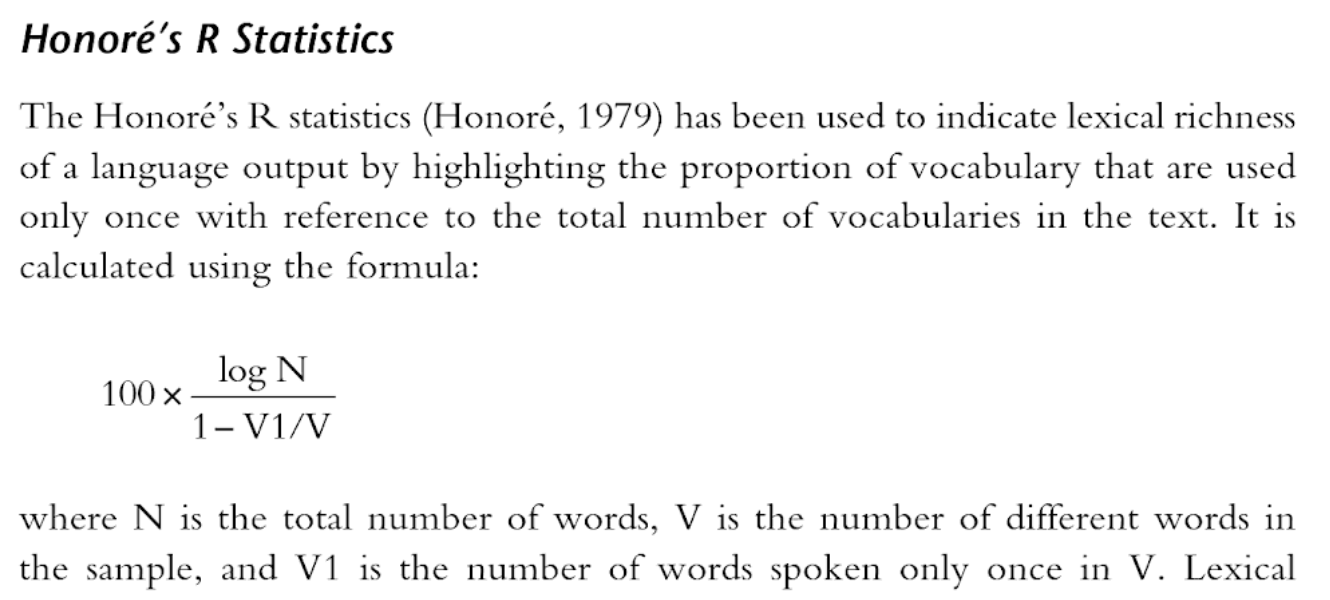
https://books.google.com/books?id=CwC4CwAAQBAJ&pg=PA111&lpg=PA111&dq=honore+statistic+lexical+richness&source=bl&ots=LPnM2j9oX5&sig=HGObkoMYRy6lLsgc80Y7tUMT7vk&hl=en&sa=X&ved=2ahUKEwjv0ubE7vTdAhXwYd8KHVRfCiMQ6AEwCXoECAUQAQ#v=onepage&q=honore&f=false

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.2.1359&rep=rep1&type=pdf

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.484.4648&rep=rep1&type=pdf

viii) Honoré’s R statistic.
If V1 denotes the number of hapax legomena recorded, then Honoré (1979) defined his
statistic as:

*R = 100log(N)/(1 - V1/V)*

As a measure of vocabulary richness which has the virtue of being insensitive to text
length, it has been used in stylometric studies by Holmes (1992) and Holmes and
Stylometric analysis of conversational speech
Forsyth (1995). Values of R typically range from 1000 to 2000 with higher values
implying richer vocabularies in the sense that a greater number of words appear
infrequently.


https://pdfs.semanticscholar.org/11f9/ef33ad001f7638ba29ee8109077de92eb1bb.pdf


Assuming log == base e...fits with 1000-2000 assumption





In [51]:
v_test

49

In [52]:
v1_test

31

In [53]:
len_test

80

In [135]:
honores_test = (100*math.log(len_test))/(1-v1_test/v_test)

In [136]:
honores_test

1192.88502832789

## Brunet's W index
W = N**(V −0.165)

(vii) Brunet’s W index.
This index, devised by Brunet (1978) and used successfully by Holmes and Forsyth
(1995), is a measure of vocabulary richness which is insensitive to text length. It is
defined as:

W= N^(V-0.165)
where N is the text length, V the number of different words and (-0.165) is a scaling
constant proposed by Brunet. The measure generally varies between 10 and 20 with a
low value indicating a lexically richer speech.
https://pdfs.semanticscholar.org/11f9/ef33ad001f7638ba29ee8109077de92eb1bb.pdf

In [55]:
brunets_test = len_test**(v_test-0.165)

In [56]:
brunets_test

8.657639833193896e+92

### Num sentences

In [144]:
#Num sentences
len(ie_preprocess(test_response))

6

## Moving window

In [89]:
#10-window size generator
#https://docs.python.org/release/2.3.5/lib/itertools-example.html
def window(seq, n=10):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result    
    for elem in it:
        result = result[1:] + (elem,)
        yield result

### Remove punctuation

In [60]:
# stripped_test = re.sub('['+string.punctuation+']',' ',test_response).split()
stripped_test= re.sub('['+string.punctuation.replace('\'','')+']',' ',test_response).split() 

In [61]:
stripped_test

['When',
 'I',
 'was',
 'a',
 'little',
 'child',
 'I',
 'had',
 'the',
 'same',
 'experience',
 'over',
 'and',
 'over',
 'It',
 'always',
 'occurred',
 'between',
 'being',
 'awake',
 'and',
 'asleep',
 'The',
 'experience',
 'had',
 'no',
 'words',
 'it',
 'was',
 'all',
 'sensation',
 'At',
 'a',
 'point',
 'between',
 'my',
 'eyes',
 'I',
 'got',
 'a',
 'feeling',
 'of',
 'all',
 'space',
 'expanding',
 'and',
 'expanding',
 'until',
 'it',
 'became',
 'so',
 'vast',
 'I',
 'was',
 'terrified',
 'Then',
 'all',
 'space',
 'would',
 'contract',
 'until',
 'it',
 'became',
 'so',
 'tiny',
 'I',
 'would',
 'be',
 'terrified',
 'I',
 'was',
 'both',
 'afraid',
 'of',
 'having',
 'this',
 'experience',
 'and',
 'welcomed',
 'it']

In [62]:
#replace any of !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ >but not apostrophe (') such that posessives are grouped as one word< with ' ' and split on empty space
#Keep contractions in for word-count
#stripped_response = re.sub('['+string.punctuation+']',' ',test_response).split()
#Dont replace '...word_list has 
stripped_responses = [re.sub('['+string.punctuation.replace('\'','')+']',' ',t).split() for t in datasheet.iloc[memory_ix,2]]

#^some contractions are multiple words but some are single words
# tokenized_mem = [re.sub('['+string.punctuation+']',' ',t).split() for t in datasheet.iloc[memory_ix,2]]

#investigate whether this is the optimal way to tokenize...puts quotes around words with apostraphes...


### POS tagging

In [64]:
#information-extraction
#https://www.nltk.org/book/ch07.html
def ie_preprocess(document):
    #sentence segmentation
    sentences = nltk.sent_tokenize(document) 
    #tokenization
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    #pos tagging
    sentences = [nltk.pos_tag(sent) for sent in sentences] 
    
    return sentences

In [65]:
import re

In [66]:
#list of lists by sentence. retains eos punctuation
##use for tokenization? trade-offs
pos_test = ie_preprocess(test_response)

In [67]:
pos_test

[[('When', 'WRB'),
  ('I', 'PRP'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('little', 'JJ'),
  ('child', 'NN'),
  ('I', 'PRP'),
  ('had', 'VBD'),
  ('the', 'DT'),
  ('same', 'JJ'),
  ('experience', 'NN'),
  ('over', 'IN'),
  ('and', 'CC'),
  ('over', 'IN'),
  ('.', '.')],
 [('It', 'PRP'),
  ('always', 'RB'),
  ('occurred', 'VBD'),
  ('between', 'IN'),
  ('being', 'VBG'),
  ('awake', 'NN'),
  ('and', 'CC'),
  ('asleep', 'NN'),
  ('.', '.')],
 [('The', 'DT'),
  ('experience', 'NN'),
  ('had', 'VBD'),
  ('no', 'DT'),
  ('words', 'NNS'),
  ('...', ':'),
  ('it', 'PRP'),
  ('was', 'VBD'),
  ('all', 'DT'),
  ('sensation', 'NN'),
  ('.', '.')],
 [('At', 'IN'),
  ('a', 'DT'),
  ('point', 'NN'),
  ('between', 'IN'),
  ('my', 'PRP$'),
  ('eyes', 'NNS'),
  ('I', 'PRP'),
  ('got', 'VBD'),
  ('a', 'DT'),
  ('feeling', 'NN'),
  ('of', 'IN'),
  ('all', 'DT'),
  ('space', 'NN'),
  ('expanding', 'VBG'),
  ('and', 'CC'),
  ('expanding', 'VBG'),
  ('until', 'IN'),
  ('it', 'PRP'),
  ('became', 'VBD'),
  ('so'

In [ ]:
#common_nouns, not proper nouns 
common_noun_count = sum([1 for sentence in pos_test for word in sentence if word[1] == 'NN' or word[1] == 'NNS'])

vb_count = sum([1 for sentence in pos_test for word in sentence if word[1] in ['VB','VBD','VBG','VBN','VBP','VBZ'] ])

pn_count = sum([1 for sentence in pos_test for word in sentence if word[1] == 'PRP' or word[1] == 'PRP$' ])

## N Vb Pn rate

In [71]:
n_rate = common_noun_count/len_test

In [72]:
vb_rate = vb_count/len_test

In [73]:
pn_rate = pn_count/len_test

In [156]:
n_rate

0.1875

In [157]:
vb_rate

0.225

In [158]:
pn_rate

0.15

## Initiating with Coordinating Conjunction
Counts, 0/1, rate-per-sentences?

In [74]:
#Number of sentences starting with coordinating conjuctions
cc_count = sum([1 for sentence in pos_test if sentence[0][1] == 'CC'])

In [75]:
cc_rate = cc_count/len(pos_test)

### Stanford parser

In [76]:
from nltk.tag import StanfordNERTagger
stanford_classifier = r'C:\Users\Renee\StanfordParser\stanford-ner-2018-02-27\classifiers\english.all.3class.distsim.crf.ser.gz'
stanford_ner_path = r'C:\Users\Renee\StanfordParser\stanford-ner-2018-02-27\stanford-ner.jar'


In [77]:
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

C:\Users\Renee\Anaconda3\lib\site-packages\nltk\tag\stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [78]:
[st.tag(t) for t in [stripped_test]]

[[('When', 'O'),
  ('I', 'O'),
  ('was', 'O'),
  ('a', 'O'),
  ('little', 'O'),
  ('child', 'O'),
  ('I', 'O'),
  ('had', 'O'),
  ('the', 'O'),
  ('same', 'O'),
  ('experience', 'O'),
  ('over', 'O'),
  ('and', 'O'),
  ('over', 'O'),
  ('It', 'O'),
  ('always', 'O'),
  ('occurred', 'O'),
  ('between', 'O'),
  ('being', 'O'),
  ('awake', 'O'),
  ('and', 'O'),
  ('asleep', 'O'),
  ('The', 'O'),
  ('experience', 'O'),
  ('had', 'O'),
  ('no', 'O'),
  ('words', 'O'),
  ('it', 'O'),
  ('was', 'O'),
  ('all', 'O'),
  ('sensation', 'O'),
  ('At', 'O'),
  ('a', 'O'),
  ('point', 'O'),
  ('between', 'O'),
  ('my', 'O'),
  ('eyes', 'O'),
  ('I', 'O'),
  ('got', 'O'),
  ('a', 'O'),
  ('feeling', 'O'),
  ('of', 'O'),
  ('all', 'O'),
  ('space', 'O'),
  ('expanding', 'O'),
  ('and', 'O'),
  ('expanding', 'O'),
  ('until', 'O'),
  ('it', 'O'),
  ('became', 'O'),
  ('so', 'O'),
  ('vast', 'O'),
  ('I', 'O'),
  ('was', 'O'),
  ('terrified', 'O'),
  ('Then', 'O'),
  ('all', 'O'),
  ('space', 'O'),
  ('

In [79]:
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer [port?] # run server

SyntaxError: invalid syntax (<ipython-input-79-ae8f5540adbf>, line 1)

### Misspellings- (stemmed) words not in dictionary

In [ ]:
#lacking
# from nltk.corpus import words
# word_list = words.words()

In [ ]:
#https://github.com/dwyl/english-words

with open('words.txt','r') as words:
    word_list = words.read().splitlines()

word_list = [w.lower() for w in word_list]

In [ ]:
len(word_list)

In [81]:
#as ratio to response length?...leave as total misspellings, length accounted for
test_misspellings = sum([1 for t in stripped_test if t.lower() not in word_list])

NameError: name 'word_list' is not defined

In [82]:
test_misspellings

NameError: name 'test_misspellings' is not defined

In [83]:
'couldn\'t' in word_list

NameError: name 'word_list' is not defined

In [84]:
'Little' in word_list

NameError: name 'word_list' is not defined

In [85]:
'little' in word_list

NameError: name 'word_list' is not defined

In [86]:
test_response

'When I was a little child I had the same experience over and over.  It always occurred between being awake and asleep.  The experience had no words...it was all sensation. At a point between my eyes I got a feeling of all space expanding and expanding until it became so vast I was terrified.  Then all space would contract until it became so tiny I would be terrified. I was both afraid of having this experience and welcomed it.'

## MATTR (window size 10) 

In [90]:
ten_window = window(stripped_test)

In [91]:
#ratio uniq words in each 10-word window
#avg for all ratios
mean([len(np.unique(t))/len(t) for t in window(stripped_test)])

0.9563380281690141

## Proportion of pn: (n + pn + proper noun) 
In attempt to model circumlocution, word finding

In [92]:
sum([1 for sentence in pos_test for word in sentence if word[1] in ['PRP','PRP$','WP','WP$'] ])/sum([1 for sentence in pos_test for word in sentence if word[1] in ['PRP','PRP$','WP','WP$','NN','NNP','NNPS','NNS'] ])

0.4444444444444444

## Word obscurity

## Syntactic complexity, depth of syntactic parse tree

In [ ]:
from nltk.corpus import treebank

In [ ]:
test_response

In [ ]:
stripped_test

In [ ]:
t = treebank.parsed_sents(test_response)
print(t)

In [ ]:
#stemming
#https://pythonprogramming.net/stemming-nltk-tutorial/
# from nltk.corpus import wordnet

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [ ]:
# os.environ['CLASSPATH'] = “stanford-pos”
# os.environ['STANFORD_MODELS'] = “stanford-pos”
# from nltk.tag import StanfordPOSTagger
# st = StanfordPOSTagger(‘english-bidirectional-distsim.tagger’) 
# st.tag(sent.split())

In [ ]:
st.tag(["we\'re"])

In [ ]:
st.tag(['we'])

In [ ]:
st.tag(['are'])

In [ ]:
nltk.pos_tag(['we\'re'])

In [ ]:
nltk.pos_tag(['we'])

In [ ]:
nltk.pos_tag(['are'])

In [ ]:
stagged_mem = [st.tag(t) for t in tokenized_mem]

In [ ]:
stagged_mem

In [ ]:
#https://nlpforhackers.io/stemmers-vs-lemmatizers/
#https://pythonprogramming.net/lemmatizing-nltk-tutorial/
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [ ]:
lemmatizer.lemmatize('notawording')

In [ ]:
lemmatizer.lemmatize('occurred')

In [ ]:
ps.stem('occurred')

In [ ]:
ps.stem('notaworking')